In [67]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import scipy.cluster.hierarchy as shc
import pandas as pd
import numpy as np
import re # Python Regular Expression module

In [68]:
df = pd.read_csv('fpl_data.csv')
df

Player_Name                     Club  ... Bonus  Clean_Sheets
0        Alex Runnarsson                  Arsenal  ...     0             0
1    Alexandre Lacazette                  Arsenal  ...    21             7
2             Bernd Leno                  Arsenal  ...    11            11
3            Bukayo Saka                  Arsenal  ...     8             8
4         Calum Chambers                  Arsenal  ...     3             2
..                   ...                      ...  ...   ...           ...
471        Ruben Vinagre  Wolverhampton Wanderers  ...     0             0
472   Rui Pedro Patricio  Wolverhampton Wanderers  ...    12            10
473       Vitor Ferreira  Wolverhampton Wanderers  ...     0             0
474         Willian Jose  Wolverhampton Wanderers  ...     3             5
475           Willy Boly  Wolverhampton Wanderers  ...     4             6

[476 rows x 13 columns]

## Exploratory Data Analysis

In [69]:
df.dtypes

Player_Name        object
Club               object
Position           object
Goals_Scored        int64
Assists             int64
Total_Points        int64
Minutes             int64
Goals_Conceded      int64
Creativity        float64
Influence         float64
Threat              int64
Bonus               int64
Clean_Sheets        int64
dtype: object

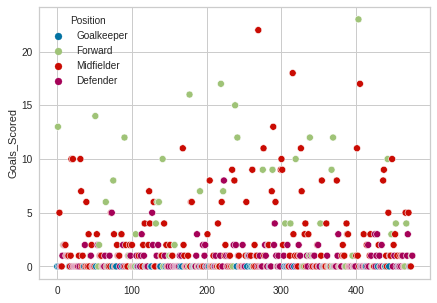

In [70]:
#Plot of Goals Scored versus index- univariate Analysis
fig, ax = plt.subplots(figsize = (7,5))
sns.scatterplot(x = df.index, y = df['Goals_Scored'], hue = df['Position'], ax = ax)

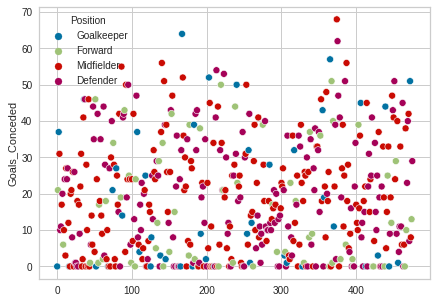

In [71]:
#Plot of Goals Conceded versus index- univariate Analysis
fig, ax = plt.subplots(figsize = (7,5))
sns.scatterplot(x = df.index, y = df['Goals_Conceded'], hue = df['Position'], ax = ax)

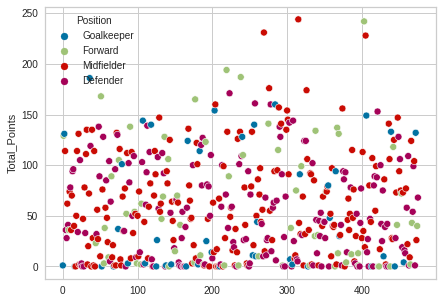

In [72]:
#Plot of Total Points Scored by a player versus index- univariate Analysis
fig, ax = plt.subplots(figsize = (7,5))
sns.scatterplot(x = df.index, y = df['Total_Points'], hue = df['Position'], ax = ax)

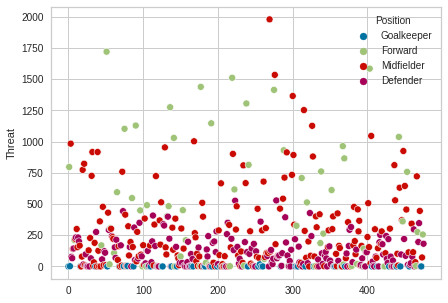

In [73]:
#Plot of Threat of a player versus index- univariate Analysis
fig, ax = plt.subplots(figsize = (7,5))
sns.scatterplot(x = df.index, y = df['Threat'], hue = df['Position'], ax = ax)

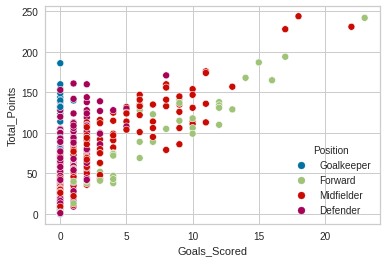

In [74]:
#Bivariate Analysis - Goals Scored versus Total Points
sns.scatterplot(x = df['Goals_Scored'], y = df['Total_Points'], hue = df['Position'])

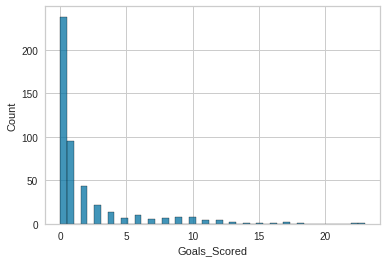

In [75]:
#Histogram plot of No of goals scored - univariate analysis
sns.histplot(df['Goals_Scored'])

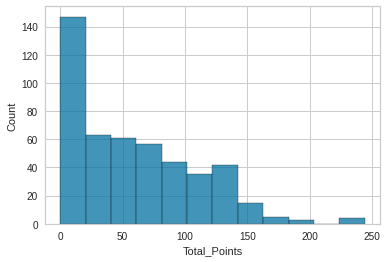

In [76]:
#Histogram plot of Total Points awarded - univariate analysis
sns.histplot(df['Total_Points'])

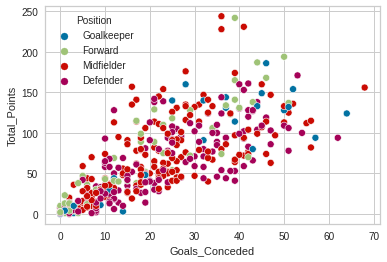

In [77]:
#Bivariate Analysis - Total Points versus Goals Conceded
sns.scatterplot(x = df['Goals_Conceded'], y = df['Total_Points'], hue = df['Position'])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


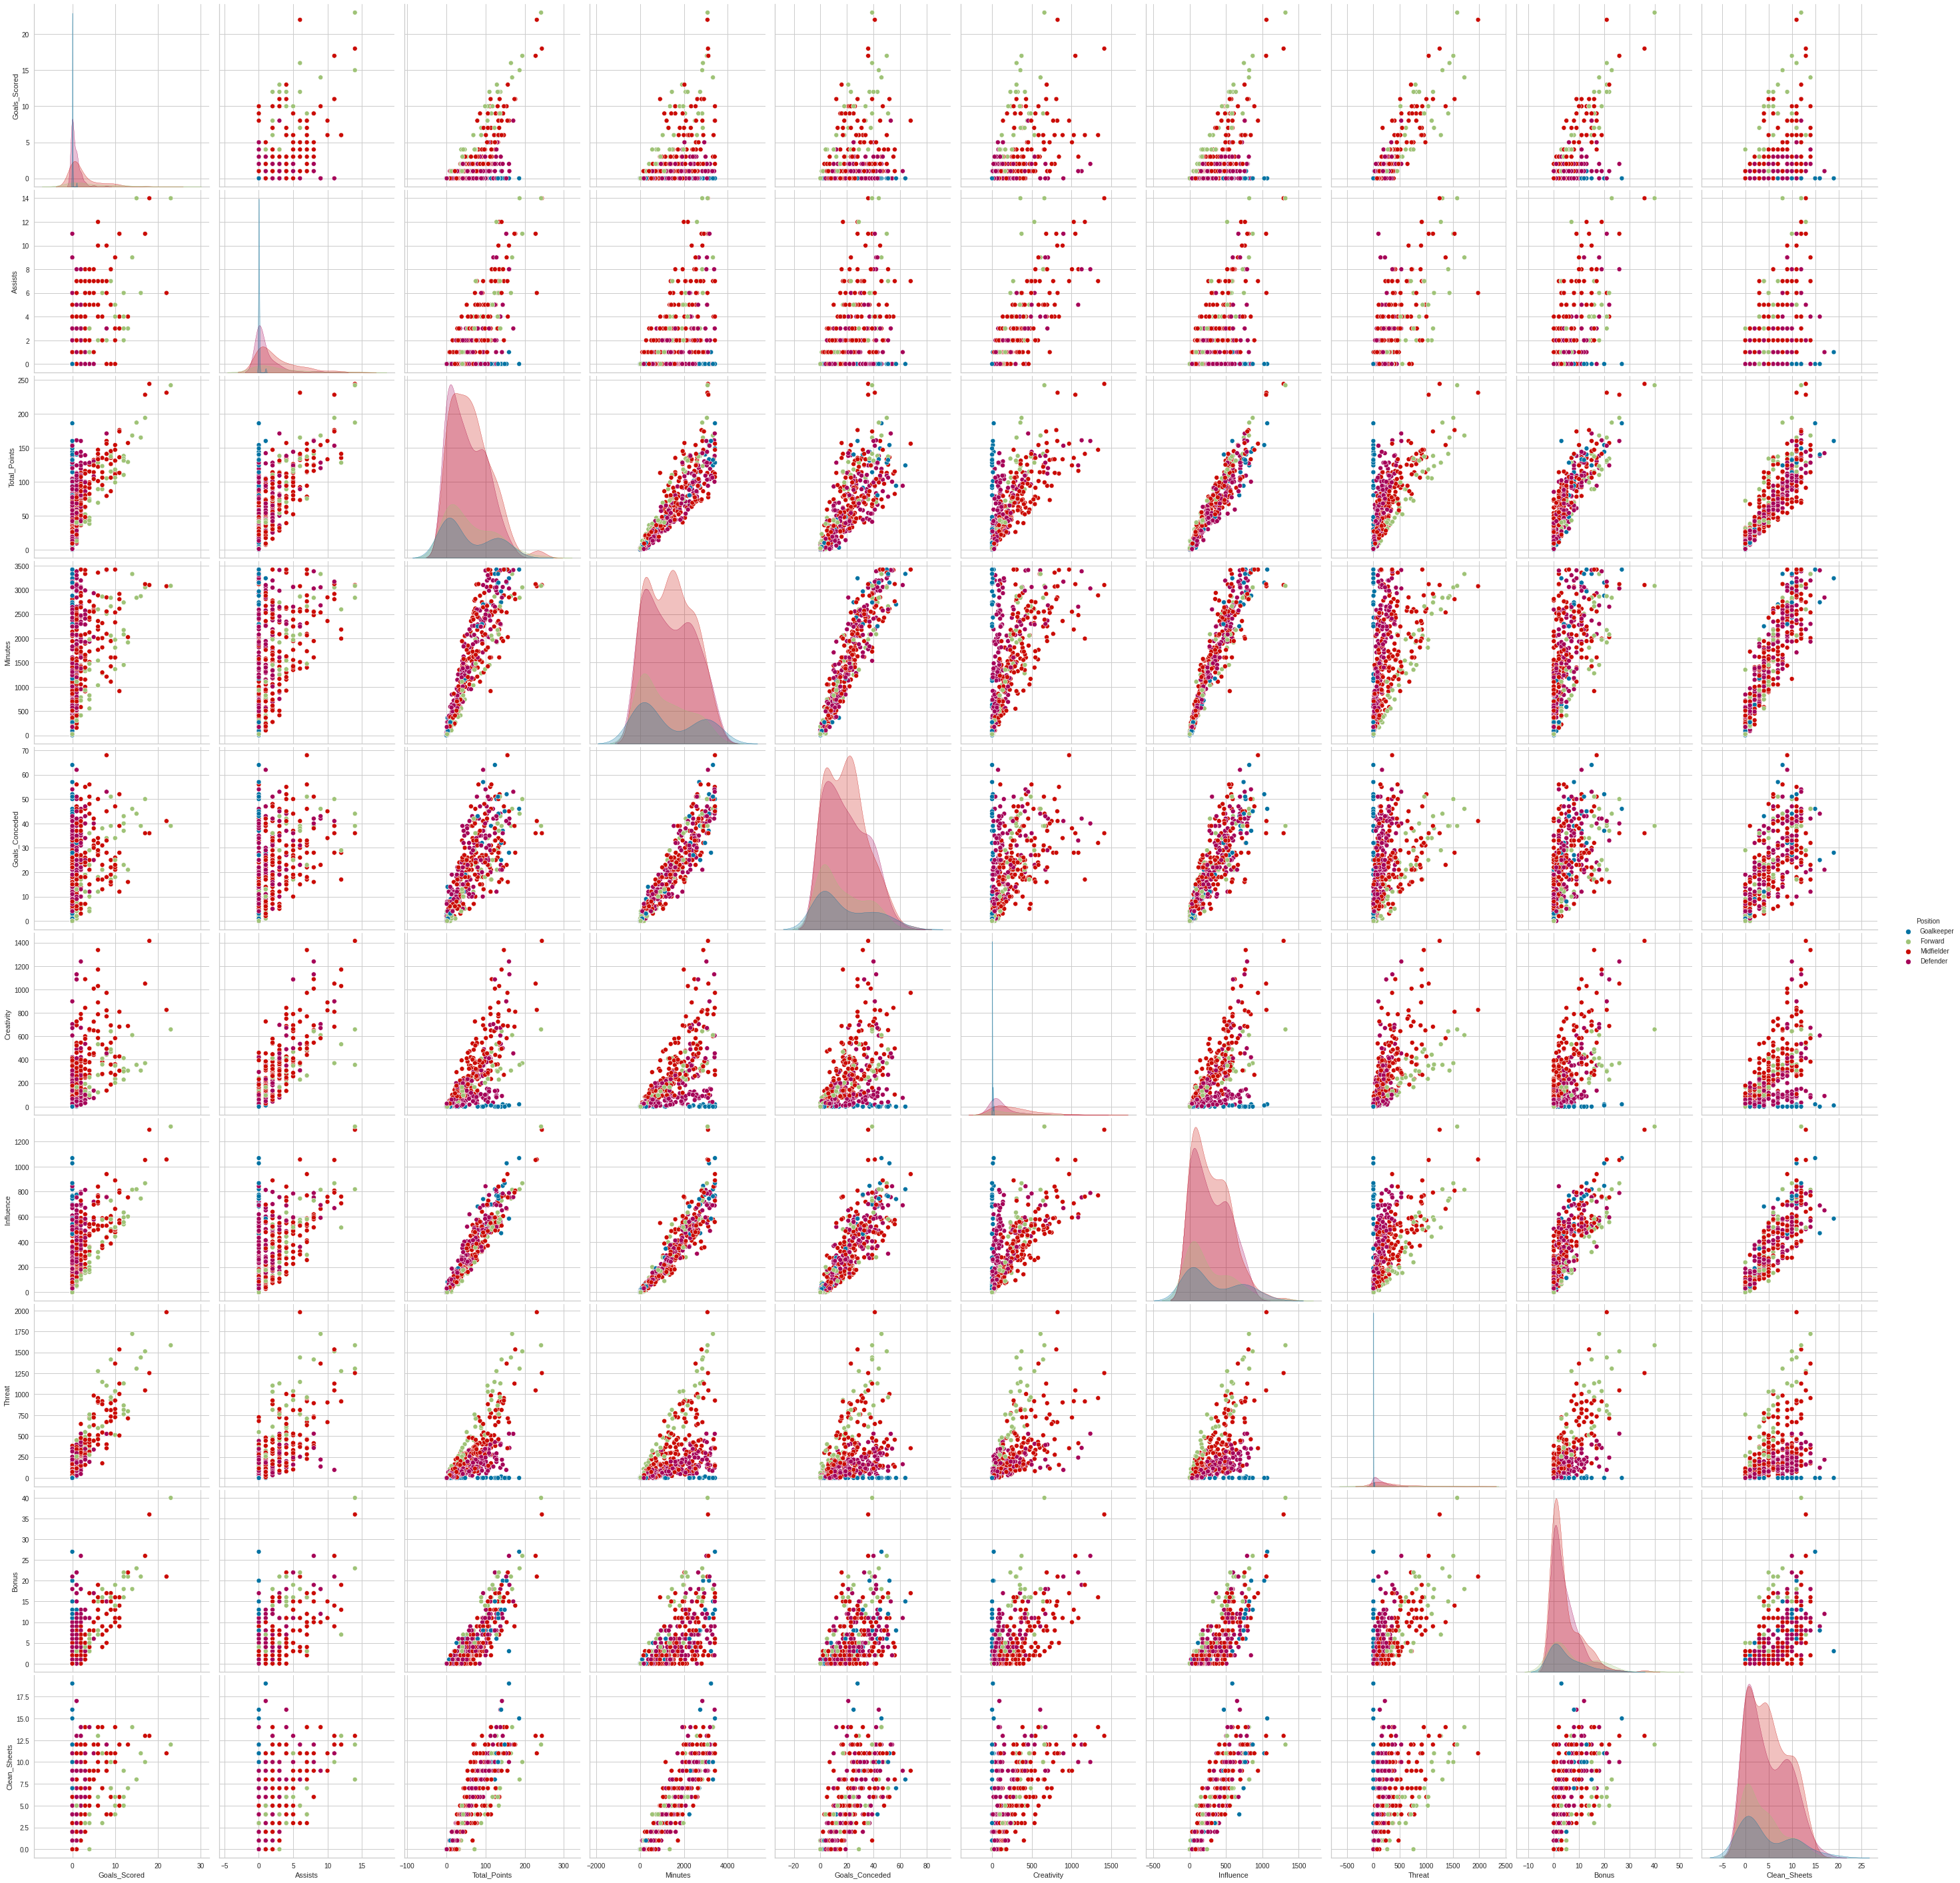

In [78]:
#Distribution Plots and scatter plots of all the variables with respect to other
sns.pairplot(df, hue = "Position", size = 4)

<AxesSubplot:xlabel='Position', ylabel='Goals_Scored'>

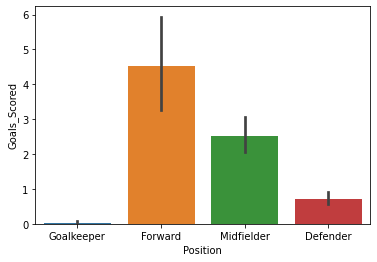

In [ ]:
#Bar plot of Goals scored versus Position
sns.barplot(x = 'Position', y = 'Goals_Scored', data = df)

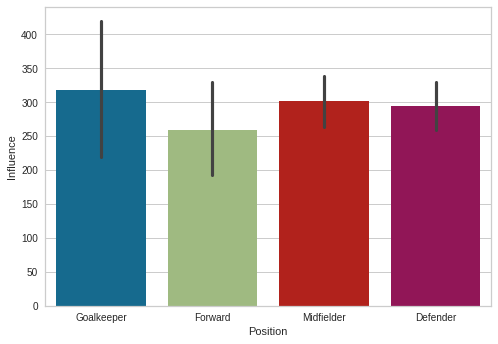

In [64]:
#Bar plot of Influence of a player versus Position
sns.barplot(x = 'Position', y = 'Influence', data = df)

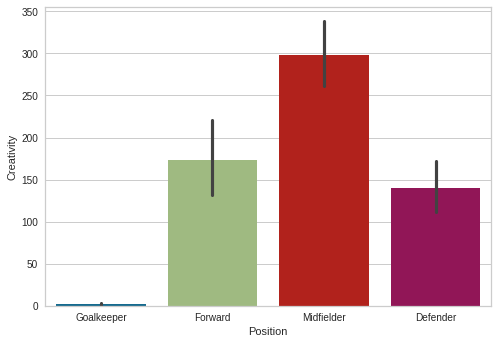

In [65]:
#Bar plot of Creativity of a player versus Position
sns.barplot(x = 'Position', y = 'Creativity', data = df)

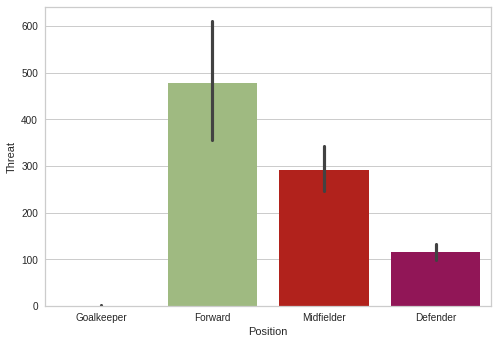

In [66]:
#Bar plot of Threat of a player versus Position
sns.barplot(x = 'Position', y = 'Threat', data = df)

<AxesSubplot:xlabel='Club', ylabel='Goals_Scored'>

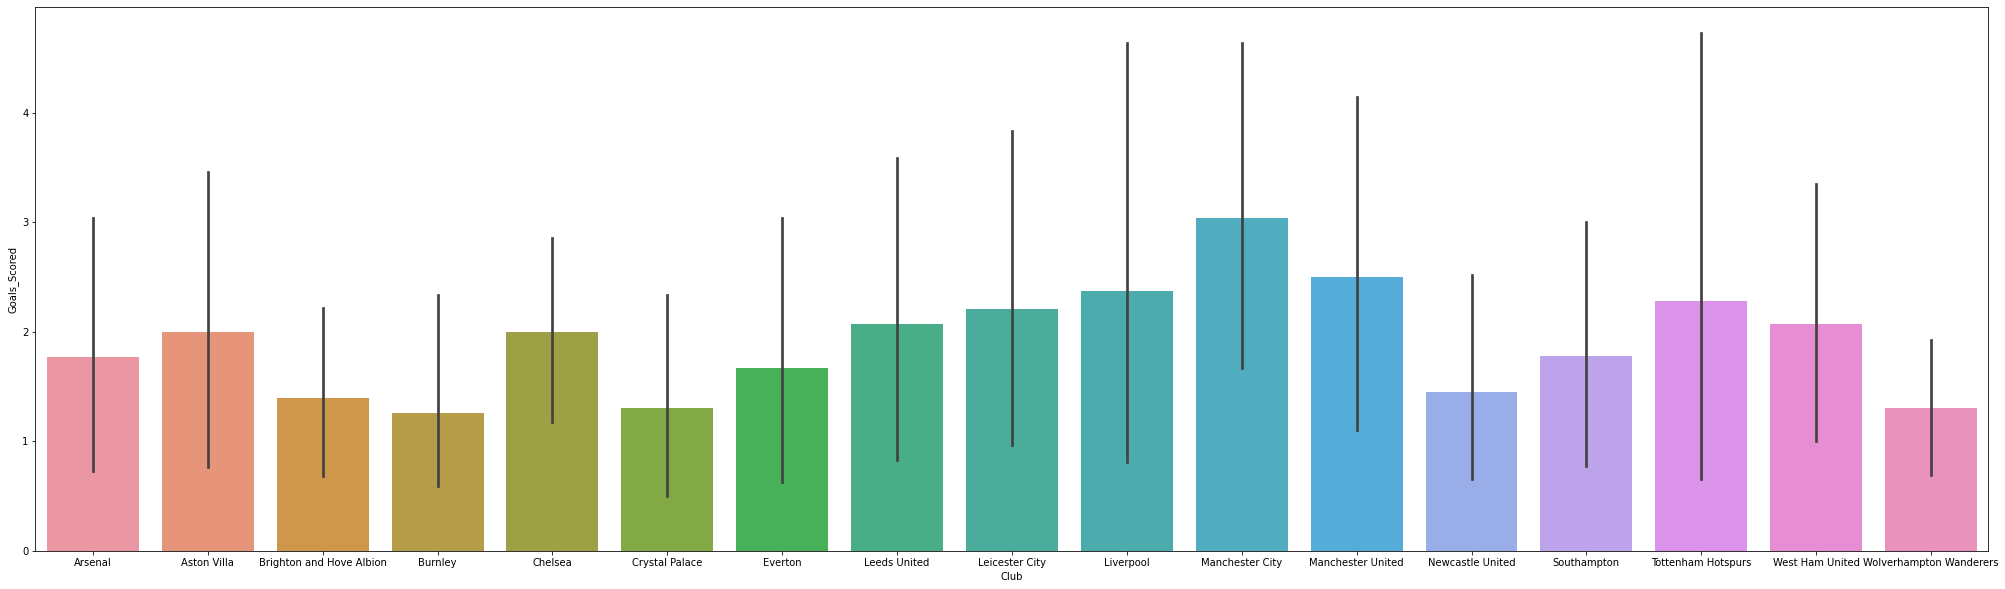

In [ ]:
#Bar Plot of Goals Scored by a club
fig, ax = plt.subplots(figsize = (35,10))
sns.barplot(x = 'Club', y = 'Goals_Scored', data = df, ax = ax)

<AxesSubplot:xlabel='Club', ylabel='Total_Points'>

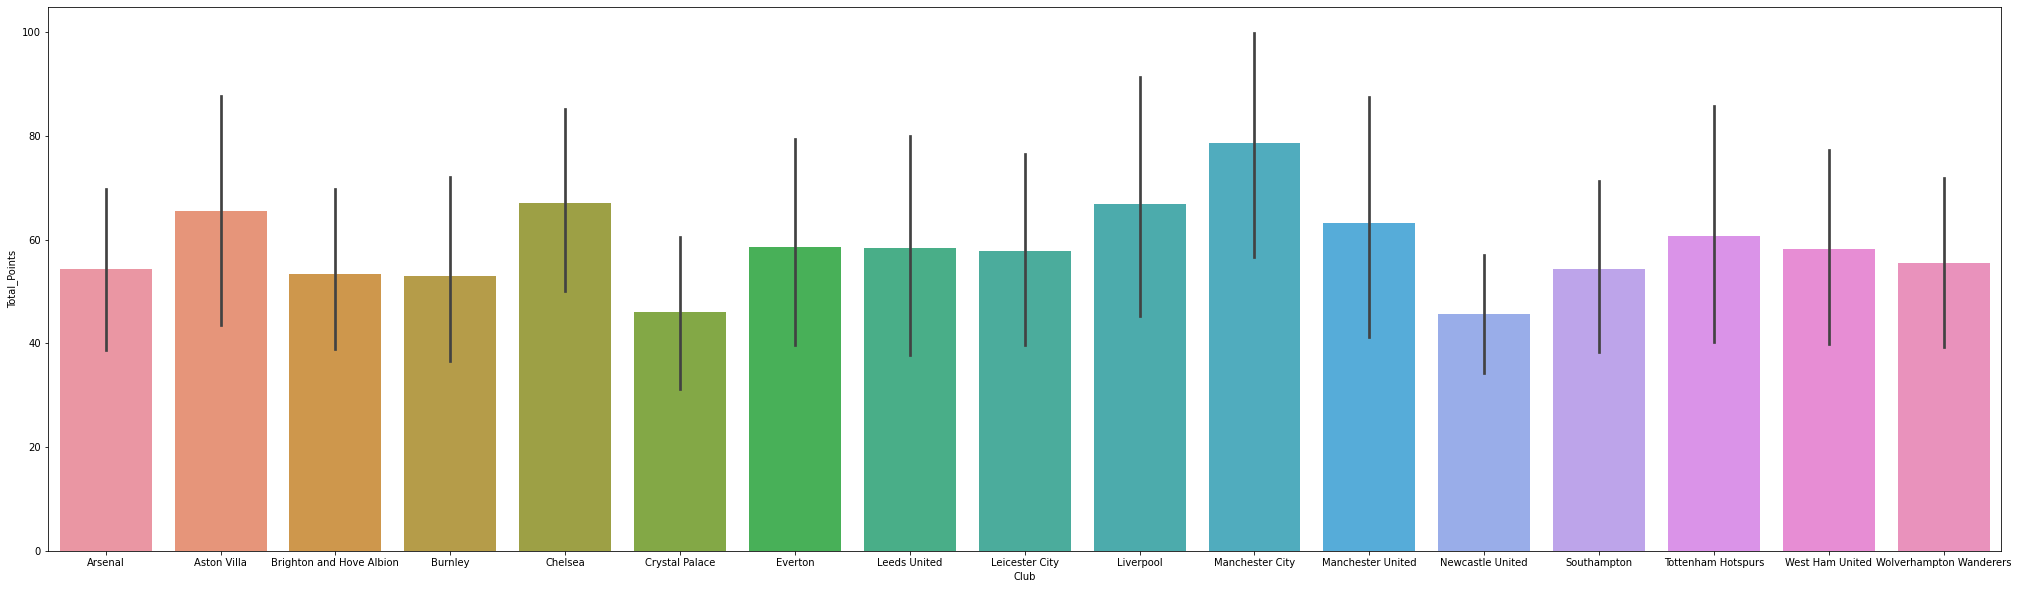

In [ ]:
#Bar Plot of Total Points Scored by a club
fig, ax = plt.subplots(figsize = (35,10))
sns.barplot(x = 'Club', y = 'Total_Points', data = df, ax = ax)

<AxesSubplot:xlabel='Club', ylabel='Creativity'>

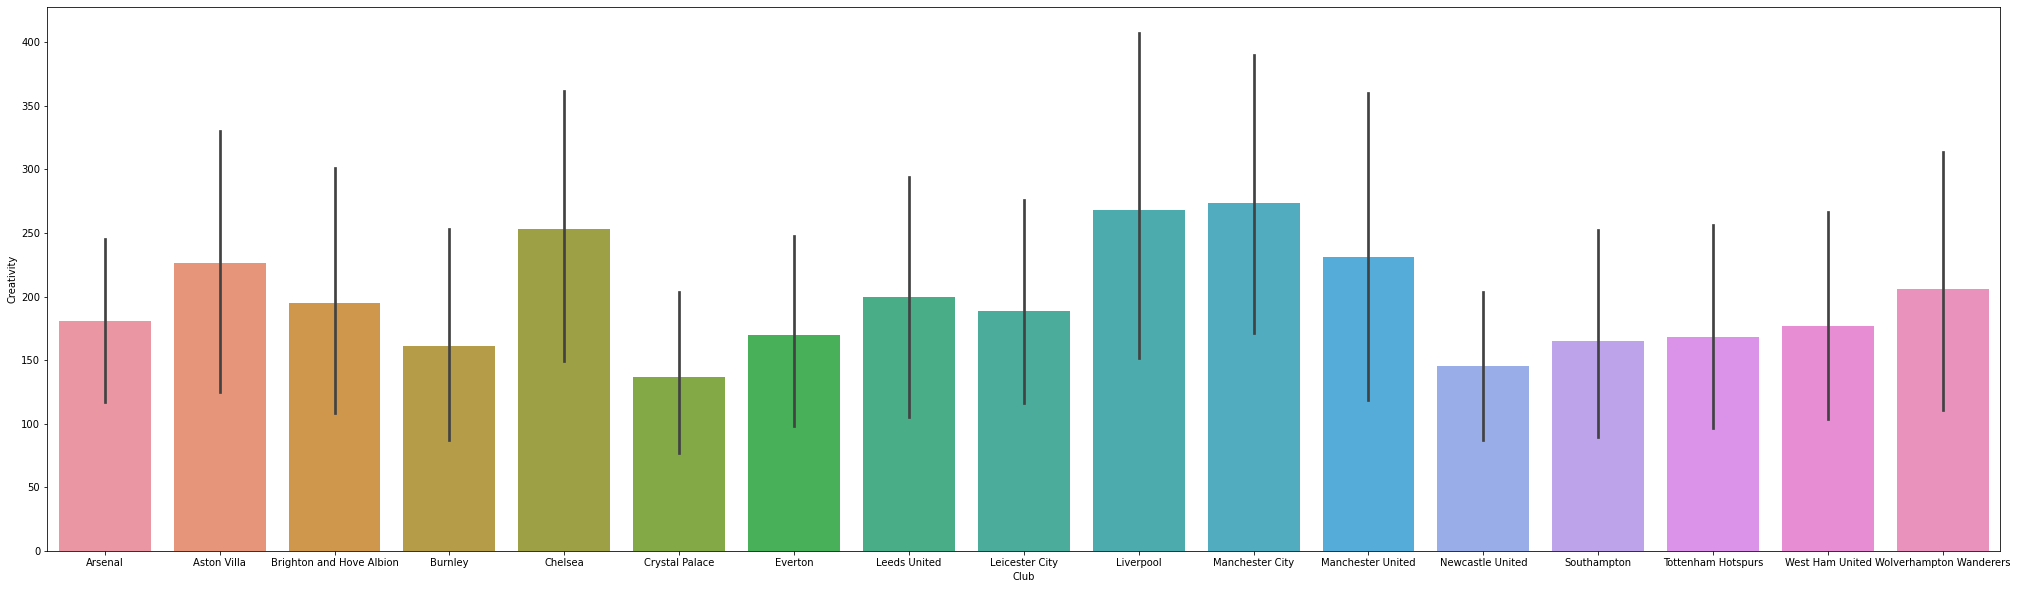

In [ ]:
#Bar Plot of Total creativity of a club
fig, ax = plt.subplots(figsize = (35,10))
sns.barplot(x = 'Club', y = 'Creativity', data = df, ax = ax)

<AxesSubplot:xlabel='Club', ylabel='Influence'>

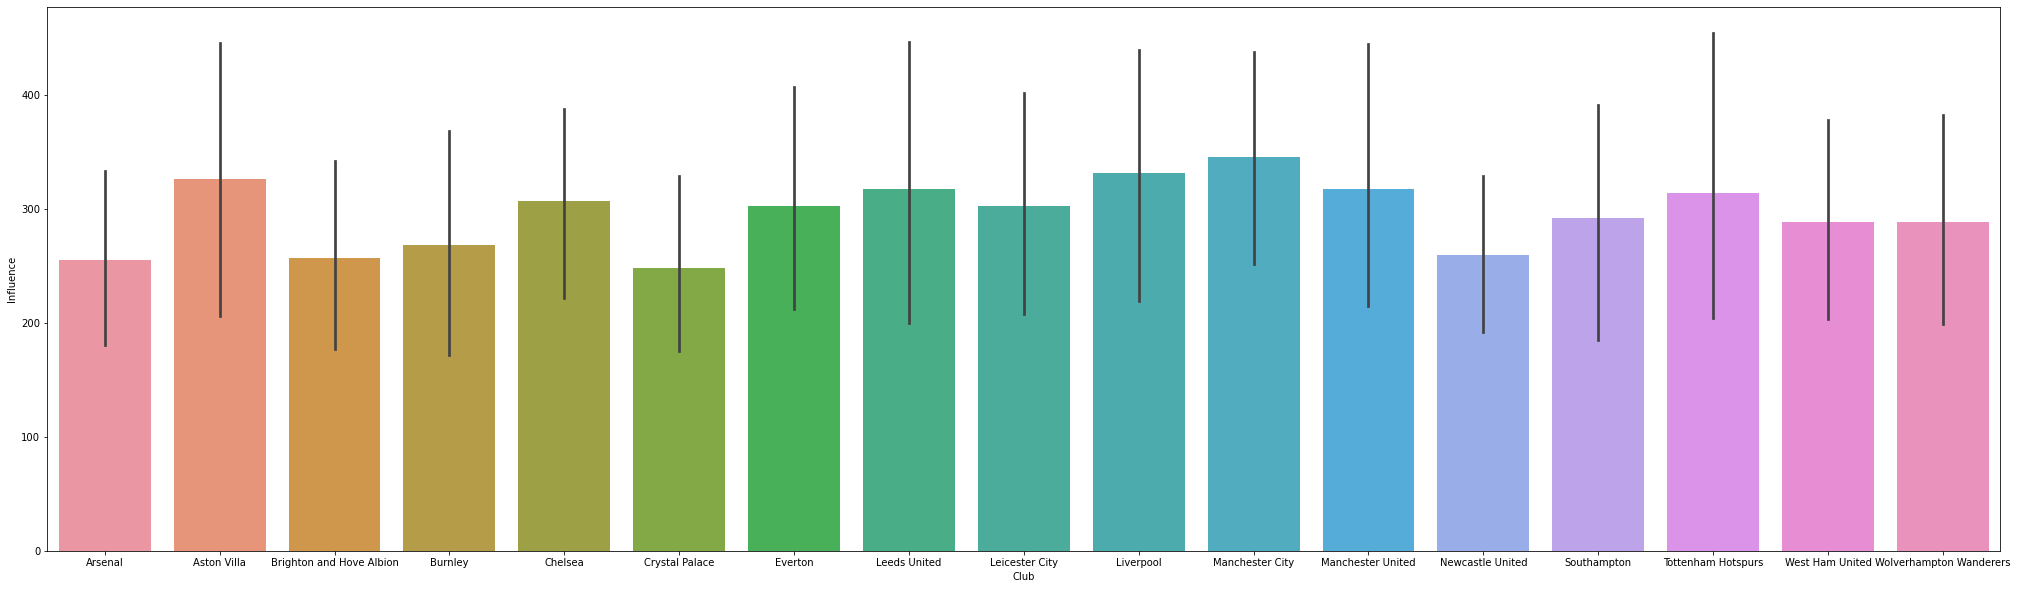

In [ ]:
#Bar Plot of Total influence of a club
fig, ax = plt.subplots(figsize = (35,10))
sns.barplot(x = 'Club', y = 'Influence', data = df, ax = ax)

# Data Preprocessing

In [6]:
#Normalising the names of players to remove any extra characters
def str_fixer(text: str):
    """uses predetermined regex pattern to normalize text"""
    result = re.sub(r"[*+]", "", text)
    return result
df["Player_Name"] = df["Player_Name"].apply(str_fixer) # applying the function

In [7]:
df.shape

(476, 13)

In [9]:
#Removing any rows with missing values
df.dropna()

Player_Name                     Club  ... Bonus  Clean_Sheets
0        Alex Runnarsson                  Arsenal  ...     0             0
1    Alexandre Lacazette                  Arsenal  ...    21             7
2             Bernd Leno                  Arsenal  ...    11            11
3            Bukayo Saka                  Arsenal  ...     8             8
4         Calum Chambers                  Arsenal  ...     3             2
..                   ...                      ...  ...   ...           ...
471        Ruben Vinagre  Wolverhampton Wanderers  ...     0             0
472   Rui Pedro Patricio  Wolverhampton Wanderers  ...    12            10
473       Vitor Ferreira  Wolverhampton Wanderers  ...     0             0
474         Willian Jose  Wolverhampton Wanderers  ...     3             5
475           Willy Boly  Wolverhampton Wanderers  ...     4             6

[476 rows x 13 columns]

In [10]:
#Checking for duplicate values
duplicate = df[df.duplicated()]
duplicate

Empty DataFrame
Columns: [Player_Name, Club, Position, Goals_Scored, Assists, Total_Points, Minutes, Goals_Conceded, Creativity, Influence, Threat, Bonus, Clean_Sheets]
Index: []

In [11]:
#Adding a new parameter Effectiveness to the dataset
df['Effectiveness'] = df['Total_Points']*100/ df["Minutes"]

In [12]:
df = df.fillna(0)

In [13]:
#Adding a new Match Performance to the dataset
df["Match_Performance"] = df['Total_Points'] - df['Bonus']

In [14]:
#Scaling the data in columnn wise way
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
df['Position'] = df['Position'].replace(['Goalkeeper'],0)
df['Position'] = df['Position'].replace(['Defender'],1)
df['Position'] = df['Position'].replace(['Forward'],2)
df['Position'] = df['Position'].replace(['Midfielder'],3)
# setting X as a new dataframe containing the scores columns
X = df[["Position", "Goals_Scored", "Assists", "Total_Points", "Minutes", "Goals_Conceded", "Creativity", "Influence", "Threat", "Bonus", "Effectiveness", "Match_Performance", "Clean_Sheets"]]
data_scaled = scaler.fit_transform(df[["Position", "Goals_Scored", "Assists", "Total_Points", "Minutes", "Goals_Conceded", "Creativity", "Influence", "Threat", "Bonus", "Effectiveness", "Match_Performance", "Clean_Sheets"]])
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)
data_scaled.head()

# K Means Clustering

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

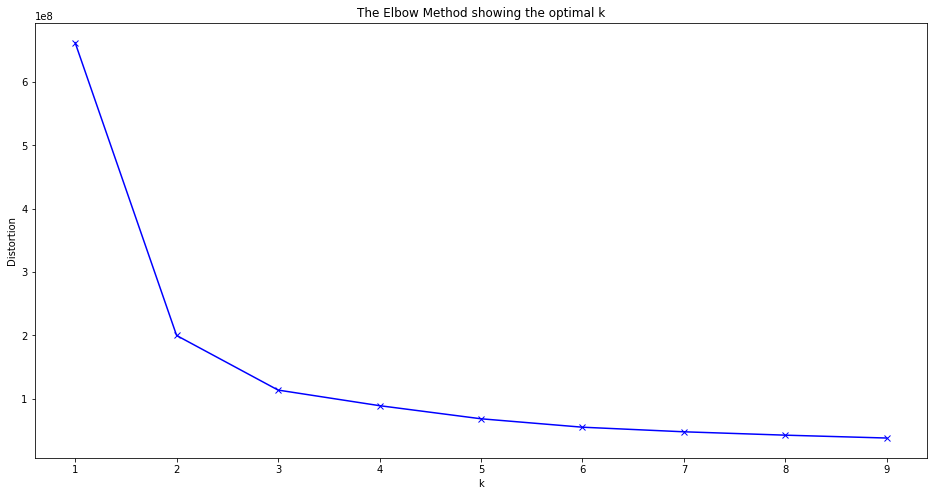

In [16]:
# importing the Kmeansmodel from sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
distortions = []
# testing clusters from 1-9
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k) 
    kmeanModel.fit(data_scaled)
    distortions.append(kmeanModel.inertia_)
# creating elbow plot
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

In [54]:
l = [0, 0, 0, 0, 0]
t = [0, 0, 0, 0, 0]
for i in df.index:
  temp = df.iloc[i]
  #print(temp)
  l[temp.tier] = l[temp.tier] + temp.Total_Points
  t[temp.tier] = t[temp.tier] + 1
print(l)  
print(t)
k = []
for i in range(0, 5):
  temp = l[i]/t[i]
  k.append(temp)
print(k)

[6052, 1504, 6992, 4950, 8356]
[116, 175, 60, 32, 93]
[52.172413793103445, 8.594285714285714, 116.53333333333333, 154.6875, 89.84946236559139]


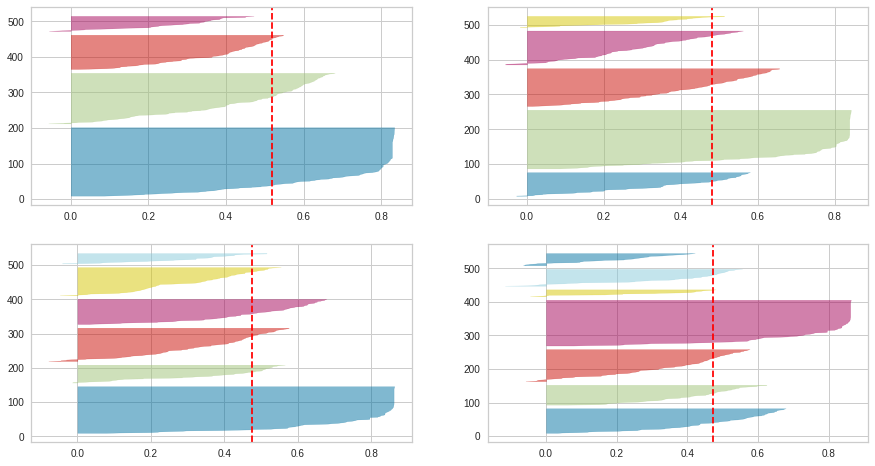

In [56]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i+2, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [52]:
#Using optimal value of cluster and applying kmeans clustering
kmeans = KMeans(n_clusters=5, random_state=1) # using 5 clusters
kmeans.fit(X) # fitting model to data
tiers = kmeans.labels_ # obtaining group labelsdf["tier"] = tiers # setting tier column as group labels
df["tier"] = tiers


In [55]:
# Calculate Silhoutte Score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.486


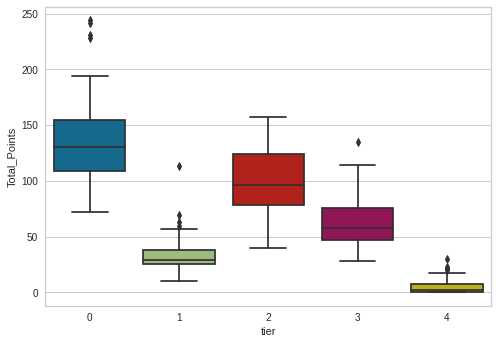

In [203]:
#Creating a box plot to plot total points
sns.boxplot(x = df.tier, y = df['Total_Points'])

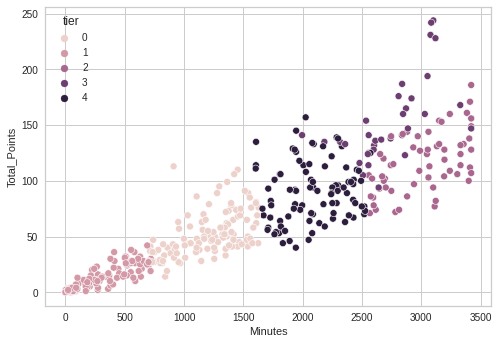

In [57]:
#Creating a scatter plot for cluster profiling
sns.scatterplot(x = df['Minutes'], y = df['Total_Points'], hue = df['tier'])

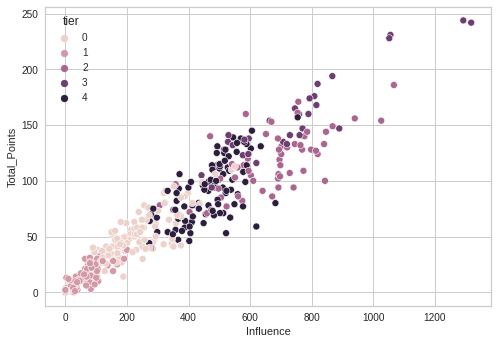

In [58]:
#Creating a scatter plot for cluster profiling
sns.scatterplot(x = df['Influence'], y = df['Total_Points'], hue = df['tier'])

# Hierarchical Clustering

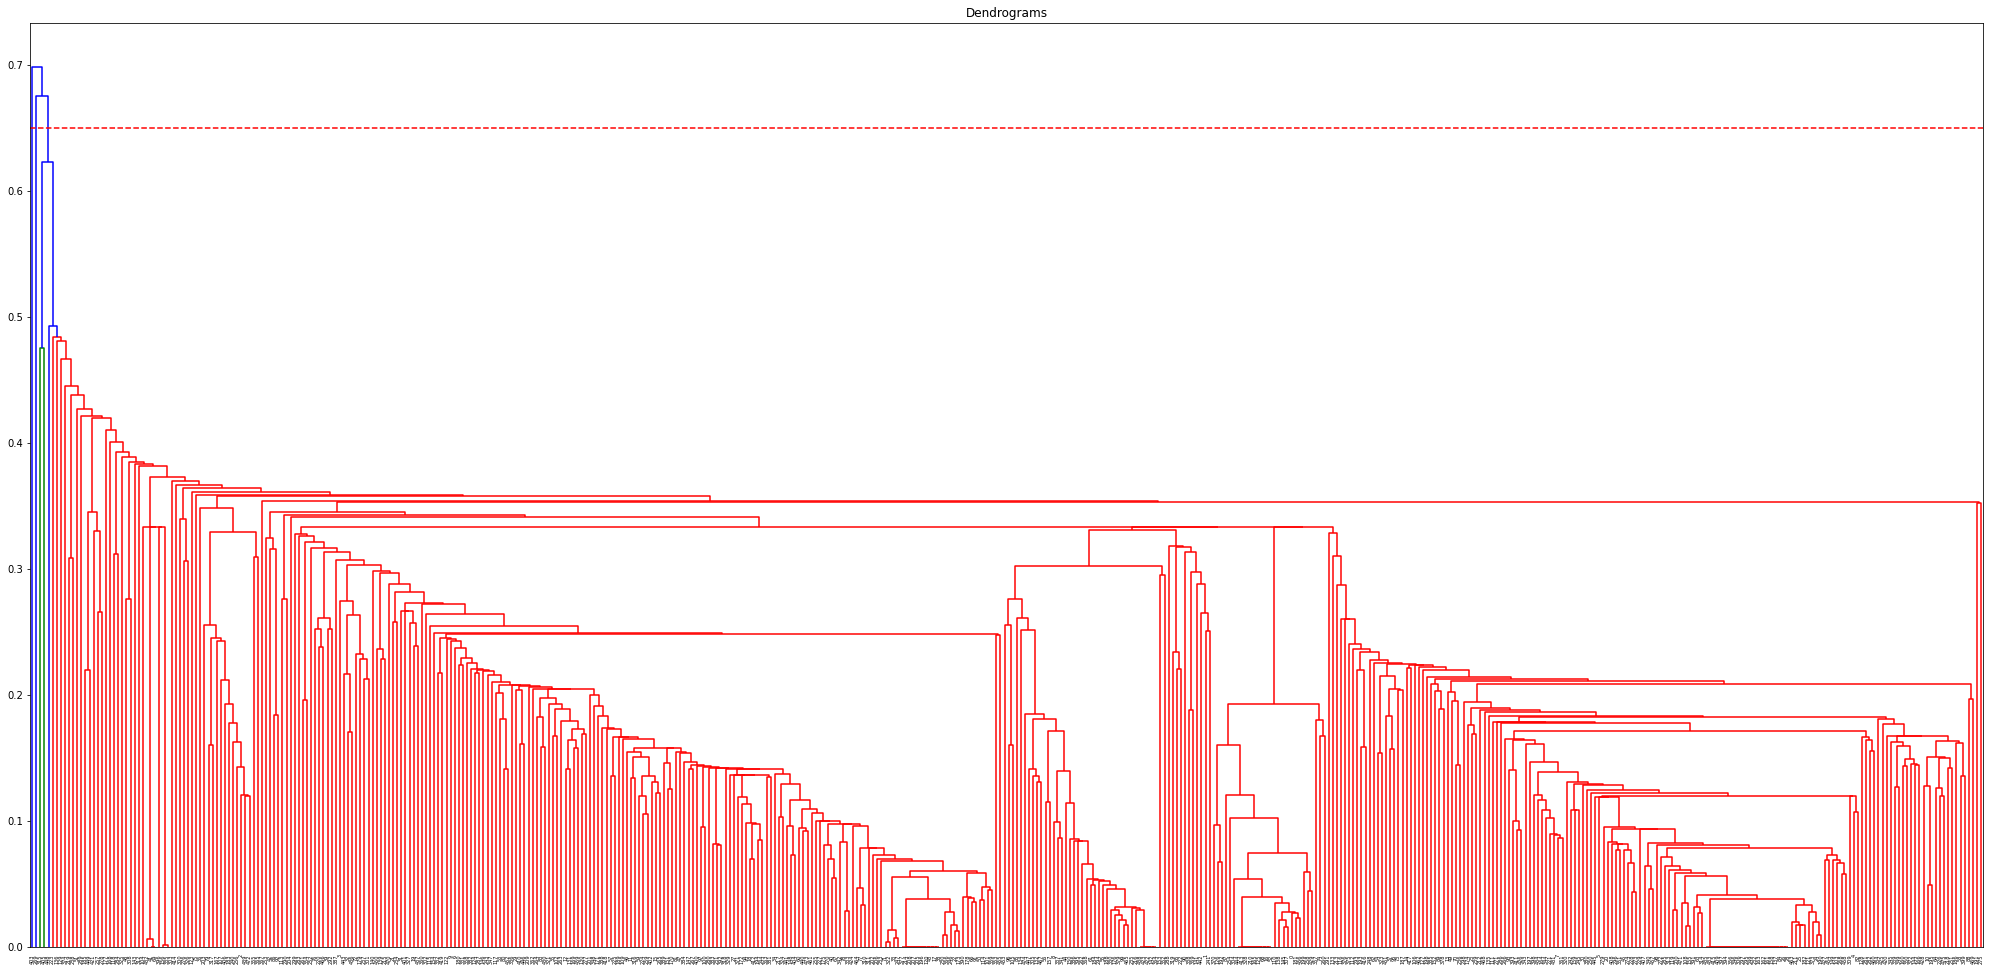

In [29]:
#Dendogram for single linkage
plt.figure(figsize=(35, 17))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='single'))
plt.axhline(y=0.65, color='r', linestyle='--')

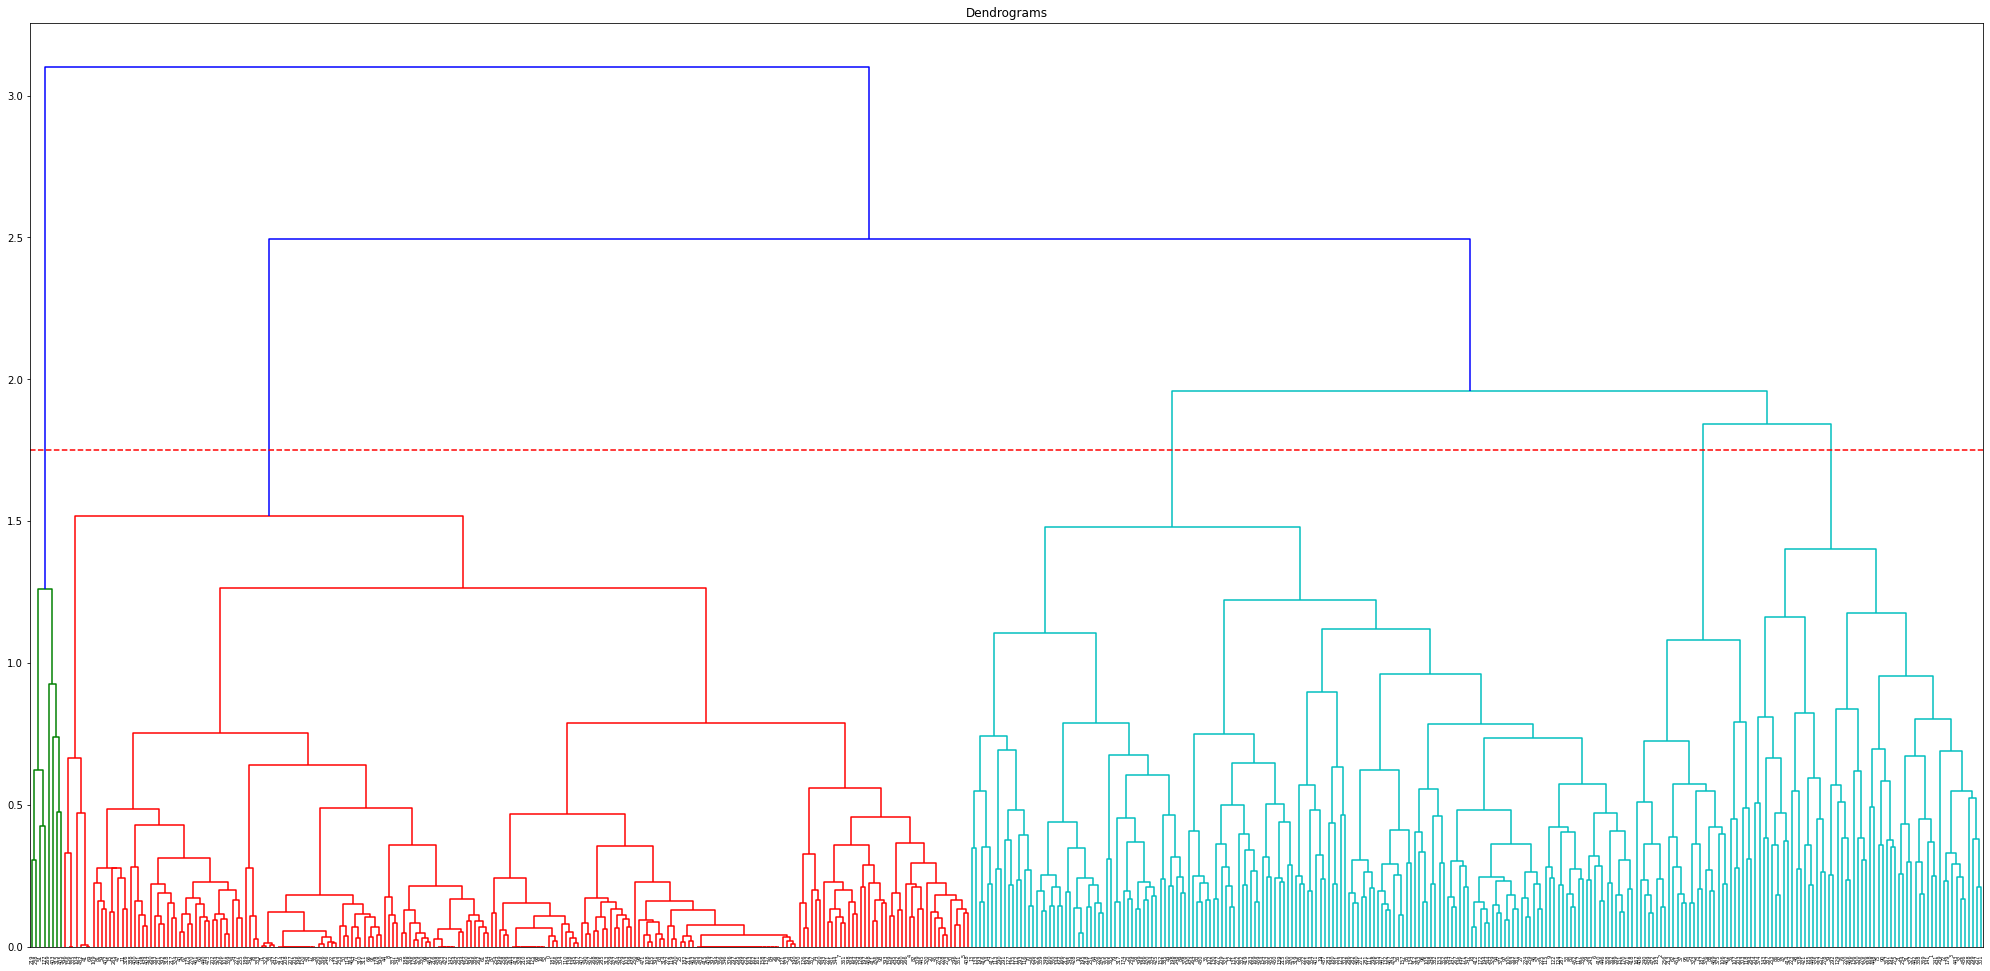

In [27]:
#Dendogram for complete linkage
plt.figure(figsize=(35, 17))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='complete'))
plt.axhline(y=1.75, color='r', linestyle='--')


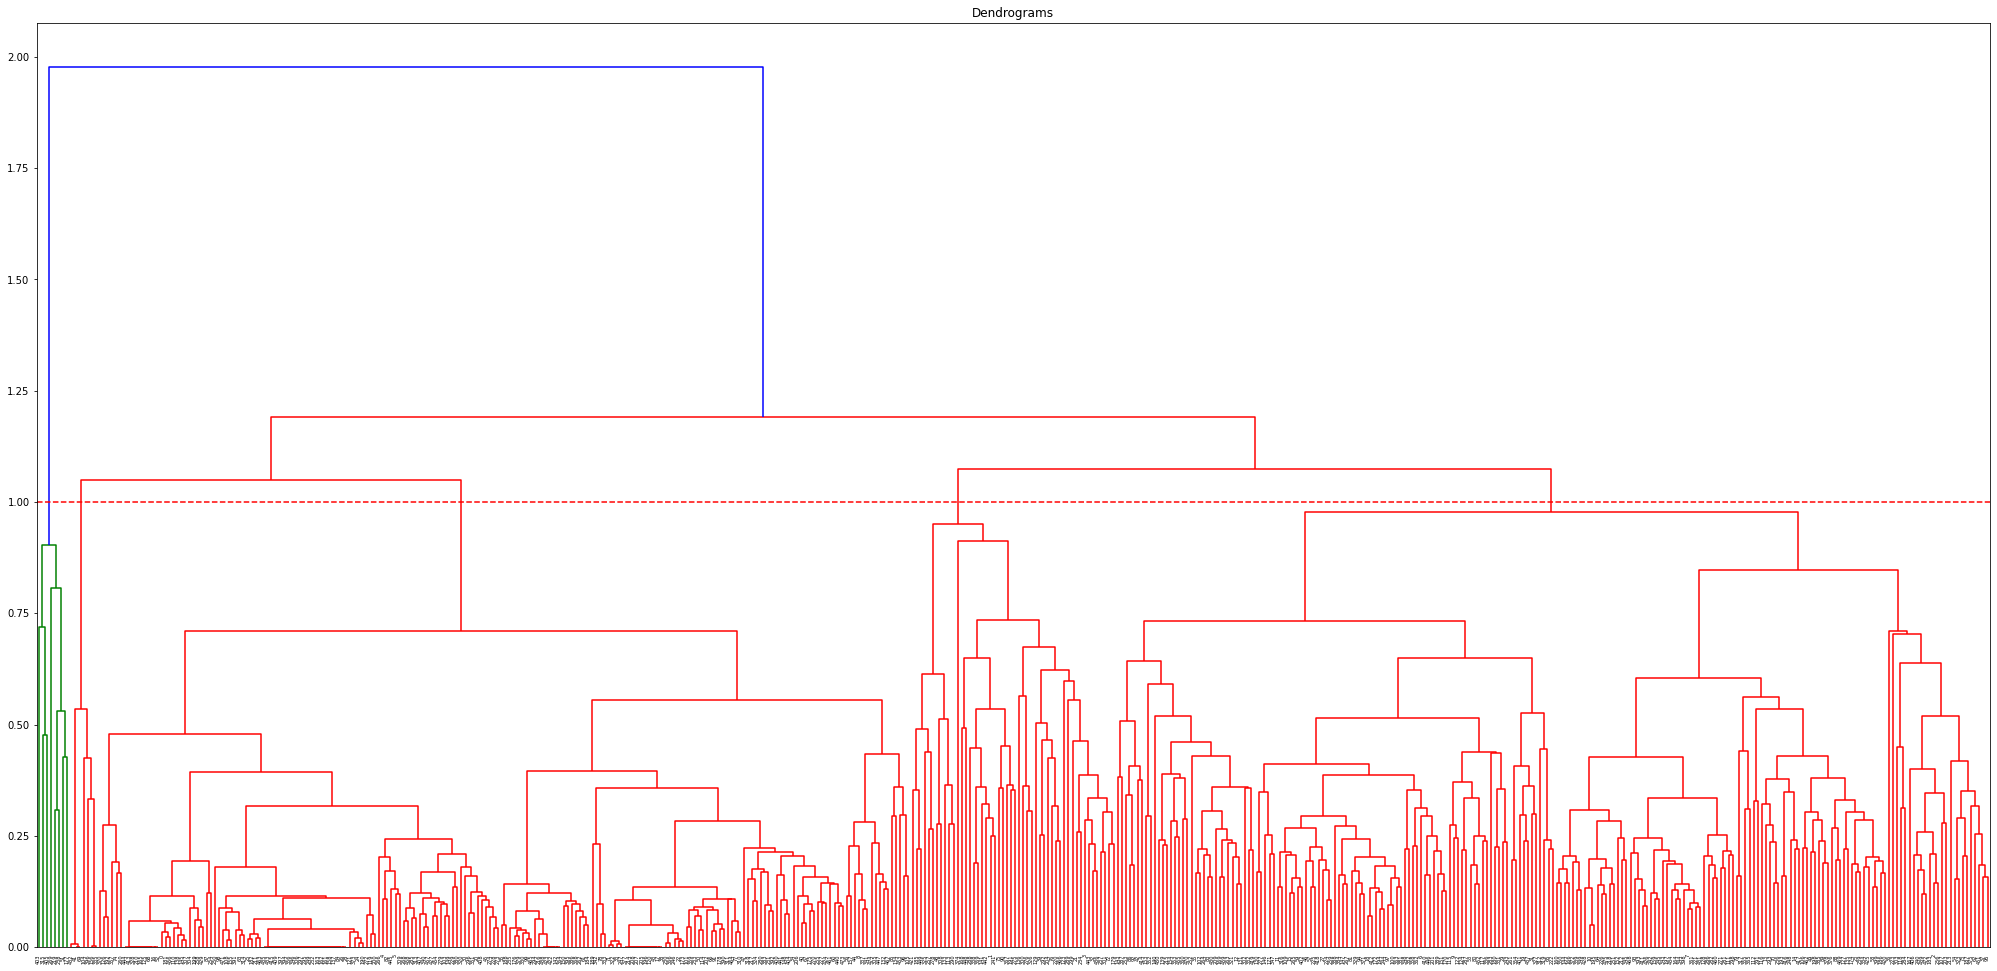

In [28]:
#Dendogram for average linkage
plt.figure(figsize=(35, 17))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='average'))
plt.axhline(y=1, color='r', linestyle='--')

In [30]:
#Using scipy to calculate the cophenet index for single linkage dendograms
from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist, squareform
origin_dists = pdist(data_scaled)
Z = single(pdist(data_scaled))
cophe_dists = cophenet(Z)
squareform(cophenet(Z))
corr_single = np.corrcoef(origin_dists, cophe_dists)[0,1]


In [31]:
#Using scipy to calculate the cophenet index for single linkage dendograms
from scipy.cluster.hierarchy import complete
origin_dists = pdist(data_scaled)
Z = complete(pdist(data_scaled))
cophe_dists = cophenet(Z)
squareform(cophenet(Z))
corr_complete = np.corrcoef(origin_dists, cophe_dists)[0,1]


In [32]:
#Using scipy to calculate the cophenet index for single linkage dendograms
from scipy.cluster.hierarchy import average
origin_dists = pdist(data_scaled)
Z = average(pdist(data_scaled))
cophe_dists = cophenet(Z)
squareform(cophenet(Z))
corr_average = np.corrcoef(origin_dists, cophe_dists)[0,1]


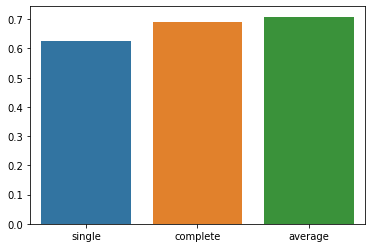

In [34]:
#Creating bar plot for different linkages and their cophenet index
sns.barplot(x = ['single', 'complete', 'average'], y = [corr_single, corr_complete, corr_average])

In [37]:
#Using Agglomerative clustering to make clusters based on number of clusters choosen from dendograms
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')  
K = cluster.fit_predict(data_scaled)
K

array([2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 1,
       2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 4, 0, 2,
       2, 2, 0, 2, 1, 0, 2, 3, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 4, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2,
       0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 4, 2, 0, 0, 2, 0,
       2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0,
       2, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 2, 4, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2,
       2, 3, 2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0,
       0, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 3,
       1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 3, 0, 0, 1,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0,
       0, 0, 2, 0, 2, 3, 2, 0, 2, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 0, 1, 1,

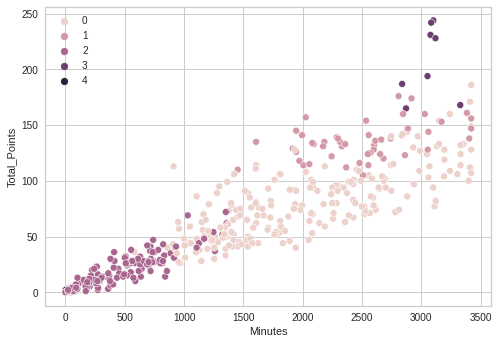

In [62]:
#Creating a scatter plot for cluster profiling
sns.scatterplot(x = df['Minutes'], y = df['Total_Points'], hue = cluster.labels_)

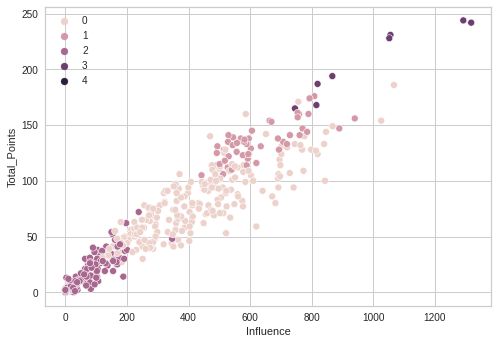

In [59]:
#Creating a scatter plot for cluster profiling
sns.scatterplot(x = df['Influence'], y = df['Total_Points'], hue = cluster.labels_)

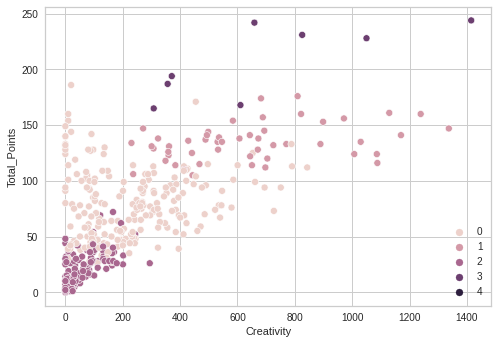

In [61]:
#Creating a scatter plot for cluster profiling
sns.scatterplot(x = df['Creativity'], y = df['Total_Points'], hue = cluster.labels_)